In [1]:
    import numpy as np
    import pandas as pd
    import re
    import nltk
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    from nltk.corpus import stopwords

In [2]:
dataframe = pd.read_csv('C:/Users/masterigs/Downloads/spam2.csv', encoding='ISO-8859-1')

In [3]:
dataframe.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataframe = dataframe.iloc[:,:2]
dataframe.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ham = dataframe[dataframe['v1']=='ham']
ham.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [6]:
spam = dataframe[dataframe['v1']=='spam']
spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [7]:
dataframe['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

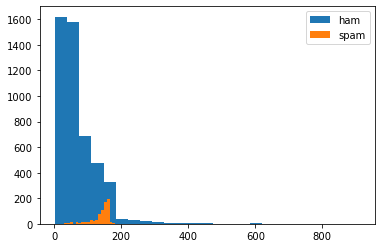

In [8]:
ham_length = ham['v2'].str.len()
spam_tweet_length=spam['v2'].str.len()
plt.hist(ham_length,bins=25,label='ham')
plt.hist(spam_tweet_length,bins=25,label='spam')
plt.legend()
plt.show()

Text(0.5, 1.0, 'ham vs spam')

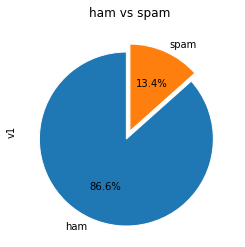

In [9]:
dataframe['v1'].value_counts().plot.pie(explode = [0.1,0], autopct = "%.1f%%",startangle = 90, wedgeprops={'edgecolor':'white', 'linewidth':1}).set_title('ham vs spam')

 ### WordCloud

In [10]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [12]:
comment_words = ""
for v in dataframe.v2:
     
    # typecaste each val to string
    v = str(v)
 
    # split the value
    tokens = v.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

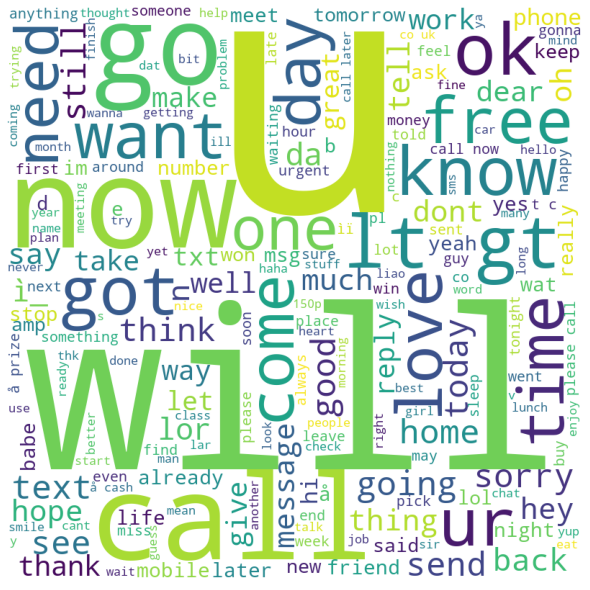

In [13]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

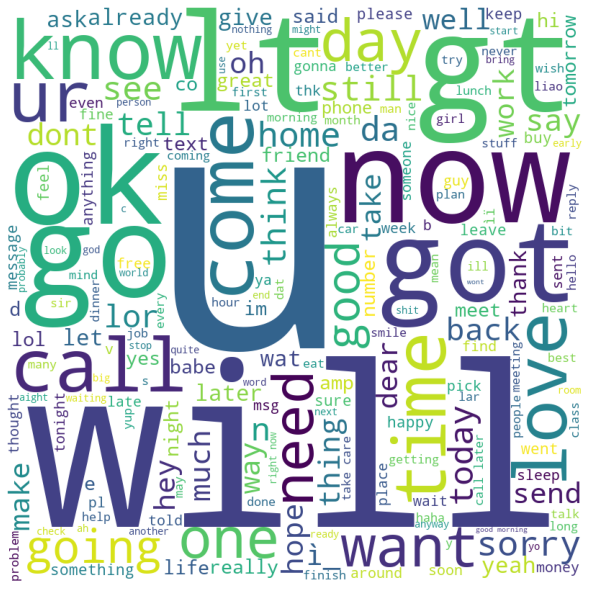

In [14]:
ham_words = ""
for val in ham.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    ham_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(ham_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

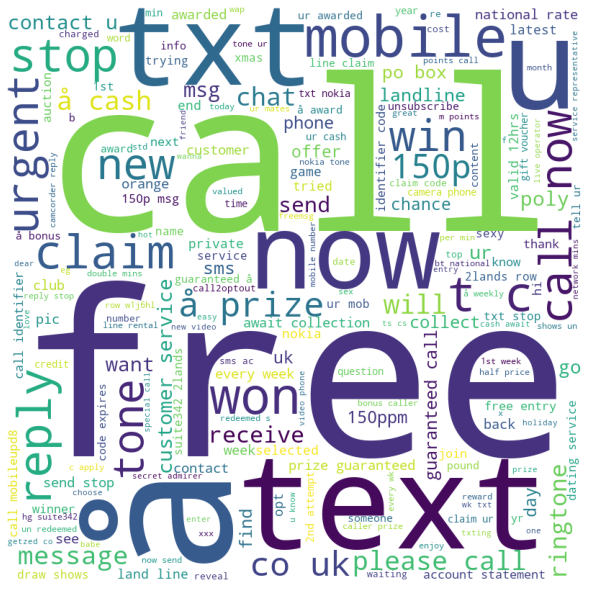

In [15]:
spam_words = ""
for v in spam.v2:
     
    # typecaste each v to string
    v = str(v)
 
    # split the value
    tokens = v.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    spam_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(spam_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Data Preprocessing

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
text = []

In [19]:

for i in range(len(dataframe)):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['v2'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text.append(review)

### Converting words into vectors using TFIDF


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1000) 
X =  cv.fit_transform(text).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
y = pd.get_dummies(dataframe['v1'])
y = y.iloc[:,1].values #Label Encoding

### Train & Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Applying different ML models

In [34]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [35]:
NaiveBayes_pred = NaiveBayes.predict(X_test)

In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_test, NaiveBayes_pred))
print()
print(metrics.confusion_matrix(y_test, NaiveBayes_pred))
print()
print(accuracy_score(y_test, NaiveBayes_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1454
           1       0.41      0.89      0.56       218

    accuracy                           0.82      1672
   macro avg       0.69      0.85      0.72      1672
weighted avg       0.90      0.82      0.84      1672


[[1169  285]
 [  24  194]]

0.8151913875598086


In [37]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train , y_train)

LogisticRegression()

In [38]:
lreg_pred = lreg.predict(X_test)

In [39]:
print(metrics.classification_report(y_test, lreg_pred))
print()
print(metrics.confusion_matrix(y_test, lreg_pred))
print()
print(accuracy_score(y_test, lreg_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1454
           1       0.98      0.79      0.88       218

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672


[[1451    3]
 [  45  173]]

0.9712918660287081


In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [41]:
svc_pred = svc.predict(X_test)

In [42]:
print(metrics.classification_report(y_test, svc_pred))
print()
print(metrics.confusion_matrix(y_test, svc_pred))
print()
print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.99      0.88      0.93       218

    accuracy                           0.98      1672
   macro avg       0.99      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672


[[1453    1]
 [  27  191]]

0.9832535885167464


In [43]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(random_state=31)
Random_Forest.fit(X_train,y_train)

RandomForestClassifier(random_state=31)

In [44]:
Random_Forest_pred = Random_Forest.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, Random_Forest_pred))
print()
print(metrics.confusion_matrix(y_test, Random_Forest_pred))
print()
print(accuracy_score(y_test, Random_Forest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.88      0.93       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672


[[1449    5]
 [  26  192]]

0.9814593301435407


## The highest accuracy is achieved by SVC followed by Random Forest, Logistic Regression and NaiveBayes.